Syntax I
========

*Notebook adapted from notes from the first session of Jorge Hankamer's [Syntax I](http://babel.ucsc.edu/~hank/112.W14.html) course at UCSC*

In [1]:
import nltk

Start with the following grammar:

In [2]:
syntax1 = nltk.CFG.fromstring("""
S -> NP VP
NP -> Art N
VP -> V NP
N -> 'pig' | 'cat' | 'farmer' | 'pitchfork'
V -> 'sleeps' | 'eats' | 'walks' | 'admires'
Art -> 'the' | 'a'
""")

using this we get "the farmer eats a pig"

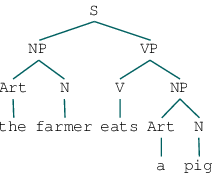

In [3]:
sent = "the farmer eats a pig".split()
parser = nltk.ChartParser(syntax1)
parser.parse_one(sent)

__NOTE__: The above cell does not work on all computers. Try this instead:
```python
sent = "the farmer eats a pig".split()
parser = nltk.ChartParser(syntax1)
pt = parser.parse_one(sent)
pt.draw() # Draw parse tree in external window
```

However, we also get "\*the farmer sleeps a cat"

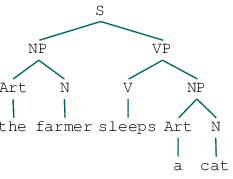

In [4]:
sent = "the farmer sleeps a cat".split()
parser = nltk.ChartParser(syntax1)
parser.parse_one(sent)

Verbs come in two _subcategories_:
- transitive (takes a NP after it)
- intranstitive (doesn't take a NP)

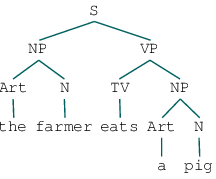

In [5]:
syntax2 = nltk.CFG.fromstring("""
S -> NP VP
NP -> Art N
VP -> IV
VP -> TV NP
N -> 'pig' | 'cat' | 'farmer' | 'pitchfork'
IV -> 'sleeps' | 'eats' | 'walks'
TV -> 'eats' | 'walks' | 'admires'
Art -> 'the' | 'a'
""")
sent = "the farmer eats a pig".split()
parser = nltk.ChartParser(syntax2)
parser.parse_one(sent)

In [6]:
sent = "the farmer sleeps a cat".split()
parser = nltk.ChartParser(syntax2)
parser.parse_one(sent)

Good.  

A verb may be in _present_ or _past_ form:

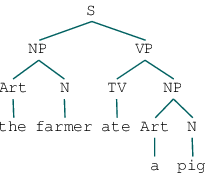

In [7]:
syntax3 = nltk.CFG.fromstring("""
S -> NP VP
NP -> Art N
VP -> IV
VP -> TV NP
N -> 'pig' | 'cat' | 'farmer' | 'pitchfork'
IV -> 'sleeps' | 'eats' | 'walks'
IV -> 'slept' | 'ate' | 'walked'
TV -> 'eats' | 'walks' | 'admires'
TV -> 'ate' | 'walked' | 'admired'
Art -> 'the' | 'a'
""")
sent = "the farmer ate a pig".split()
parser = nltk.ChartParser(syntax3)
parser.parse_one(sent)

Nouns and verbcs can be _singular_ or _plural_:

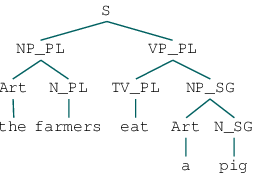

In [8]:
syntax4 = nltk.CFG.fromstring("""
S -> NP_SG VP_SG
S -> NP_PL VP_PL
NP_SG -> Art N_SG
NP_PL -> Art N_PL
VP_SG -> IV_SG
VP_PL -> IV_PL
VP_SG -> TV_SG NP_SG
VP_SG -> TV_SG NP_PL
VP_PL -> TV_PL NP_SG
VP_PL -> TV_PL NP_PL
N_SG -> 'pig' | 'cat' | 'farmer' | 'pitchfork'
N_PL -> 'pigs' | 'cats' | 'farmers' | 'pitchforks'
IV_SG -> 'sleeps' | 'eats' | 'walks'
IV_PL -> 'sleep' | 'eat' | 'walk'
IV_SG -> 'slept' | 'ate' | 'walked'
IV_PL -> 'slept' | 'ate' | 'walked'
TV_SG -> 'eats' | 'walks' | 'admires'
TV_PL -> 'eat' | 'walk' | 'admire'
TV_SG -> 'ate' | 'walked' | 'admired'
TV_PL -> 'ate' | 'walked' | 'admired'
Art -> 'the' | 'a'
""")
sent = "the farmers eat a pig".split()
parser = nltk.ChartParser(syntax4)
parser.parse_one(sent)

### Subject-Verb Agreement Rule:
A V may be past.  
If a V is -past, the number of the V must agree w/ the number of the N to its left.

This is getting complicated, let's introduce features:

In [9]:
from nltk.grammar import FeatureGrammar

In [11]:
syntax5 = FeatureGrammar.fromstring('''
S -> NP[NUM=?n] VP[NUM=?n]
NP[NUM=?n] -> Art N[NUM=?n]
VP[TENSE=?t, NUM=?n] -> V[SUBCAT=intrans, TENSE=?t, NUM=?n]
VP[TENSE=?t, NUM=?n] -> V[SUBCAT=trans, TENSE=?t, NUM=?n] NP
N[NUM=sg] -> 'pig' | 'cat' | 'farmer' | 'pitchfork'
N[NUM=pl] -> 'pigs' | 'cats' | 'farmers' | 'pitchforks' 
V[SUBCAT=intrans, TENSE=pres, NUM=sg] -> 'sleeps' 
V[TENSE=pres, NUM=sg] -> 'eats' | 'walks'
V[SUBCAT=trans, TENSE=pres, NUM=sg] -> 'admires'
V[SUBCAT=intrans, TENSE=pres, NUM=pl] -> 'sleep'
V[TENSE=pres, NUM=pl] -> 'eat' | 'walk'
V[SUBCAT=trans, TENSE=pres, NUM=pl] -> 'admire'
V[SUBCAT=intrans,TENSE=past] -> 'slept' 
V[TENSE=past] -> 'ate' | 'walked'
V[SUBCAT=trans, TENSE=past] -> 'admired'
Art -> 'a' | 'the' 
''')
sent = "the farmers eat a pig".split()
parser = nltk.FeatureChartParser(syntax5)
print parser.parse_one(sent)

(S[]
  (NP[NUM='pl'] (Art[] the) (N[NUM='pl'] farmers))
  (VP[NUM='pl', TENSE='pres']
    (V[NUM='pl', TENSE='pres'] eat)
    (NP[NUM='sg'] (Art[] a) (N[NUM='sg'] pig))))


### Article-Noun Agreement Rule

A N and its Art must agree in number.  
A sg (count) N requires an Art.  
N may be either _count_ or _mass_

In [12]:
syntax6 = FeatureGrammar.fromstring('''
S -> NP[NUM=?n] VP[NUM=?n]
NP[NUM=?n] -> N[NUM=?n]
NP[NUM=?n] -> Art N[NUM=?n]
NP[NUM=?n] -> N[NUM=?n]
VP[TENSE=?t, NUM=?n] -> V[SUBCAT=intrans, TENSE=?t, NUM=?n]
VP[TENSE=?t, NUM=?n] -> V[SUBCAT=trans, TENSE=?t, NUM=?n] NP
N[NUM=sg] -> 'pig' | 'cat' | 'farmer' | 'pitchfork'
N[NUM=pl] -> 'pigs' | 'cats' | 'farmers' | 'pitchforks' 
N[NUM=mass] -> 'dirt' | 'blood' | 'water' 
V[SUBCAT=intrans, TENSE=pres, NUM=sg] -> 'sleeps' 
V[TENSE=pres, NUM=sg] -> 'eats' | 'walks'
V[SUBCAT=trans, TENSE=pres, NUM=sg] -> 'admires'
V[SUBCAT=intrans, TENSE=pres, NUM=pl] -> 'sleep'
V[TENSE=pres, NUM=pl] -> 'eat' | 'walk'
V[SUBCAT=trans, TENSE=pres, NUM=pl] -> 'admire'
V[SUBCAT=intrans,TENSE=past] -> 'slept' 
V[TENSE=past] -> 'ate' | 'walked'
V[SUBCAT=trans, TENSE=past] -> 'admired'
Art[NUM=sg] -> 'a' | 'this' | 'that'
Art[NUM=pl] -> 'these' | 'those'
Art -> 'the' 
''')
sent = "the farmers eat dirt".split()
parser = nltk.FeatureChartParser(syntax6)
print parser.parse_one(sent)

(S[]
  (NP[NUM='pl'] (Art[] the) (N[NUM='pl'] farmers))
  (VP[NUM='pl', TENSE='pres']
    (V[NUM='pl', TENSE='pres'] eat)
    (NP[NUM='mass'] (N[NUM='mass'] dirt))))


### Assignment: 
Modify the grammar so I can say

1. The hungry monkey in the cage ate a banana
2. The hungry monkey put a banana in his ear
3. The monkey sleeps in his cage
4. White flowers turn brown in sunlight
5. The children drive me crazy with their chatter
6. \*The monkey put a banana
7. \*The monkey put under the table
8. \*The monkey put  

\* means grammar should not produce